# Plot examples

Examples of how to use the functions of the module mlnowcasting.utils.plot_utils

In [1]:
import context
from mlnowcasting.predict import predict
from mlnowcasting.utils.plot_utils import plot_obs_pred, plot_pred
import numpy as np

/s/chopin/d/proj/jcuomo/699/repository


Let's first get some predictions 

In [2]:
dataset     = '../data/datasets/example_dataset.npy'
dataset_names     = '../data/datasets/example_names.npy'
model_name = 'convGRU_16_16'
th_dbz = 20 # reflectivity threshold for computing the metrics
N = 0 # sample from dataset
titles = np.load(dataset_names, allow_pickle=True)
prediction, target = predict(dataset, model_name)
prediction.shape

=> loaded checkpoint 'convGRU_16_16.th' (trained for 300 epochs)


(10, 16, 64, 64)

There are two plot functions, one that plots both observation and prediction (mostly to make quick comparisons), and the other plots only one at a time and has more personalization parameters (recommended for final plots).

## Plot observation and prediction

It plots only 1 event at a time, so I indexed to the first event

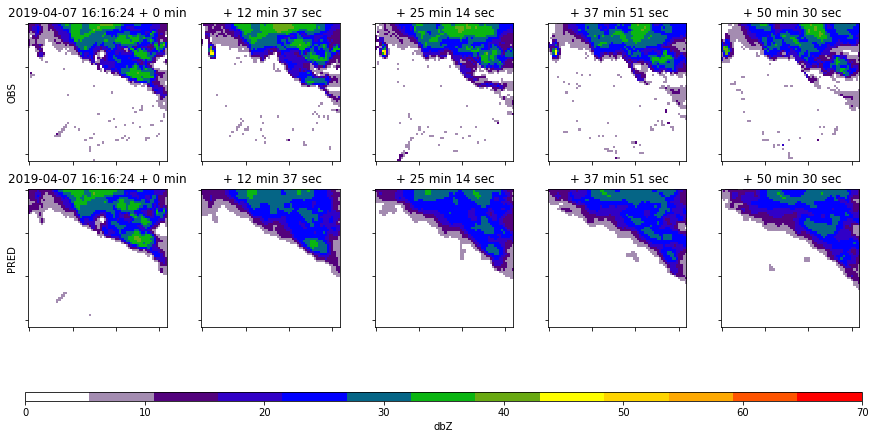

In [3]:
fig = plot_obs_pred(target[0], prediction[0], N=5, cmap='darts', title_files=titles[0])

## Individual plots

- N_frames: how many frames to plot
- cmap: colormap. Recommended to use 'darts' or 'binary'.
- label: label of the plot. e.g. name of the model use for the prediction or 'Observation' if the ground truth.
- title_files: list of each frame's original-file-name to use as titles.
- scan_time: time between each frame. Only used if no 'title_files' are given
- title_1st: if given, use it for the first frame (normally to show the radar used and the initial time)
- plot_map: if True plot the coordinates and base map
- plot_colorbar: if True plot colorbar
- bottom_label: if True plot X-label

Using filenames to get exact time for each frame.

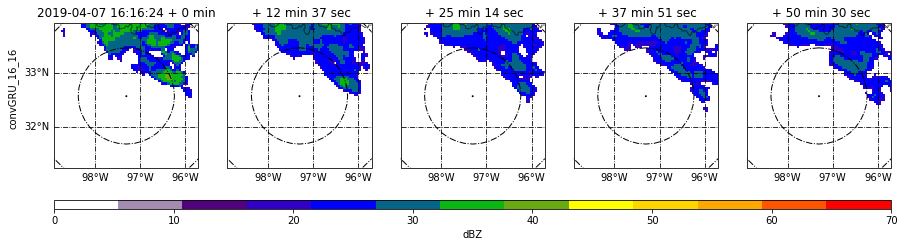

In [4]:
fig = plot_pred(prediction[0], N_frames=5, cmap='darts', label=model_name, 
              title_files=titles[0], scan_time=None, title_1st=None,
              plot_map=True, 
              plot_colorbar=True, bottom_label=True)

Using only the first frame filename and then a fixed scan time.

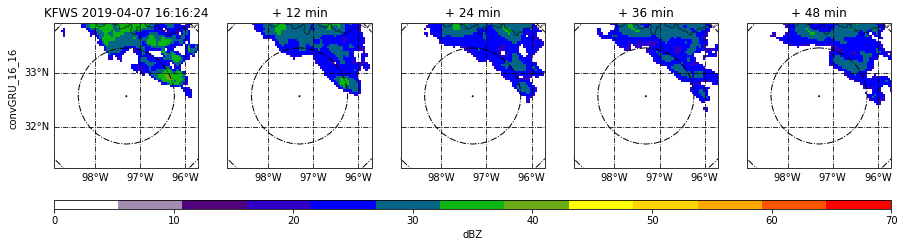

In [5]:
fig = plot_pred(prediction[0], N_frames=5, cmap='darts', label=model_name, 
              title_files=None, scan_time=4, title_1st=titles[0,0],
              plot_map=True, 
              plot_colorbar=True, bottom_label=True)

Using a constant scan time only.

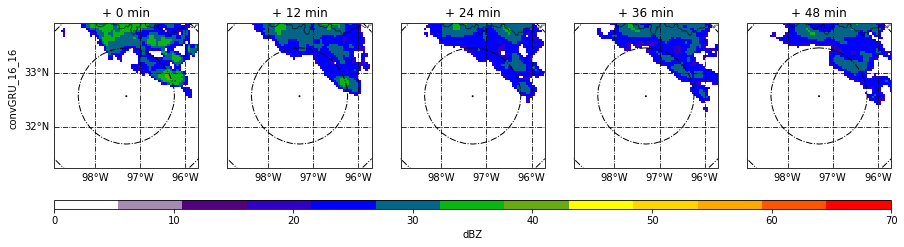

In [6]:
fig = plot_pred(prediction[0], N_frames=5, cmap='darts', label=model_name, 
              title_files=None, scan_time=4, title_1st=None,
              plot_map=True, 
              plot_colorbar=True, bottom_label=True)

Plotting more frames

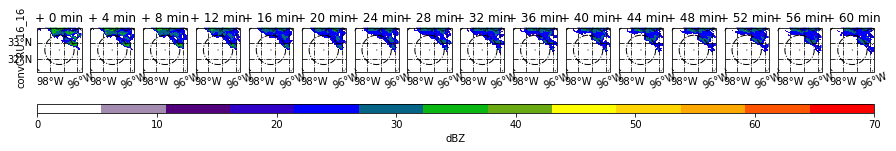

In [7]:
fig = plot_pred(prediction[0], N_frames=16, cmap='darts', label=model_name, 
              title_files=None, scan_time=4, title_1st=None,
              plot_map=True, 
              plot_colorbar=True, bottom_label=True)

Plotting the background 'maps' takes time (I think because of the projection), so you can skip that using.

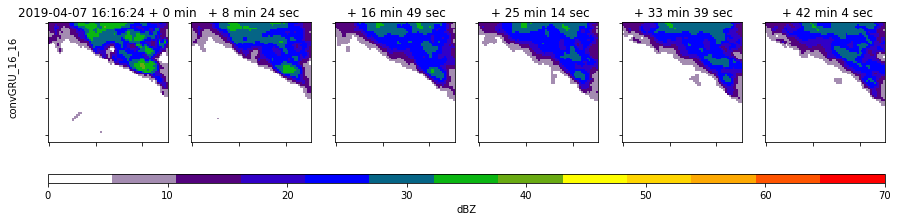

In [8]:
fig = plot_pred(prediction[0], N_frames=6, cmap='darts', label=model_name, 
              title_files=titles[0], scan_time=None, title_1st=None,
              plot_map=False, 
              plot_colorbar=True, bottom_label=True)

And also, you can go to the 'plot_utils.py' module and modify the 'get_map()' function to plot different stuff.

Many available drawing option are commented in the code:
        #ax.coastlines()                         draw the coastlines
        #ax.stock_img()                          draw a low resolution land 
        #ax.add_feature(land_50m)                draw a land with a bit more resolution 
        #ax.add_feature(cfeature.RIVERS)         draw the rivers
        ax.add_feature(cfeature.STATES)          draw the states (US)
        #ax.add_image(tiles_sat, 8, alpha=alpha) draw the google satellite images